In [51]:
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv('gurgaon_properties_post_feature_selection.csv')

In [53]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48


* Before using Linear Regression Model 
* Performing One Hot Encoding on the columns : sectors, balcony, agePosession, furnishing_type, luxury_category, floor_category

In [54]:
X = df.drop(columns=['price'])
y = df['price']

In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [56]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

* As we saw the price column was right skewed so applying the log1p Transformation to the target variable

In [57]:
y_transformed = np.log1p(y)

<Axes: ylabel='Frequency'>

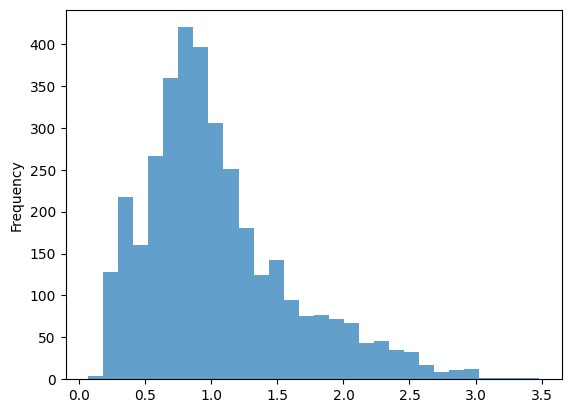

In [58]:
y_transformed.plot(kind='hist', bins=30, alpha=0.7)

In [59]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'store room', 'servant room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder = 'passthrough'
)

In [62]:
# Creating a PipeLine
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [63]:
# K-Fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [64]:
scores.mean()

np.float64(0.8845360715052786)

In [65]:
scores.std()

np.float64(0.014784881452420018)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.2, random_state = 42)

In [67]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'store room',
                                                   'servant room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [68]:
y_pred = pipeline.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

np.float64(0.1216750065607477)

* after nullifying the log(1+y) transformation

In [70]:
mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))

np.float64(0.5324591082613231)